# Text Processing, Vectorization and Visualization 
This colab document demostrates following steps in text processing:
1. Text Processing
    * Reading text files with different formats
    * Scraping from web
    * Normalize 
    * Tokenize
    * Stemming 
    * Lemmatization
    * Case folding / Lowercasing
    * POS Tagging
    * NER
2. Vectorization
    * Count Vectorizer
    * TFIDF Vectorizer
3. Visualization
    * Plot tokens with t-sne
    * Similar vectors





In [1]:
# Dataset representation
import pandas as pd
# Official Website/Documentation: https://pandas.pydata.org/
# Good Tutotial Link: https://www.youtube.com/watch?v=ZyhVh-qRZPA&list=PL-osiE80TeTsWmV9i9c58mdDCSskIFdDS  

In [2]:
# String manipulations
import string
import re
# Official Documentation (String): https://docs.python.org/3/library/string.html 
# Official Documentation (Regular Expression): https://docs.python.org/3/library/re.html 
# Good Tutorial Link (String): https://www.youtube.com/watch?v=k9TUPpGqYTo 
# Good Tutorial Link (Regular Expression): https://www.datacamp.com/community/tutorials/python-regular-expression-tutorial 

## Reading Data:  From CSV File
- Read the dataset in an appropriate data structure

In [3]:
# CSV Form
df_csv = pd.read_csv("https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv")
df_csv.head()

,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...


In [4]:
df_csv['text'] #or df_csv.text 

0       tv future in the hands of viewers with home th...
1       worldcom boss  left books alone  former worldc...
2       tigers wary of farrell  gamble  leicester say ...
3       yeading face newcastle in fa cup premiership s...
4       ocean s twelve raids box office ocean s twelve...
                              ...                        
2220    cars pull down us retail figures us retail sal...
2221    kilroy unveils immigration policy ex-chatshow ...
2222    rem announce new glasgow concert us band rem h...
2223    how political squabbles snowball it s become c...
2224    souness delight at euro progress boss graeme s...
Name: text, Length: 2225, dtype: object

In [5]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


## Reading Data:  From Json File

In [6]:
# Reading "json" file using pandas
df_json = pd.read_json("https://raw.githubusercontent.com/HSLCY/ABSA-BERT-pair/master/data/sentihood/sentihood-train.json")
df_json.head()

,opinions,id,text
0,"[{'sentiment': 'Negative', 'aspect': 'price', ...",1430,LOCATION1 is transforming and the prices w...
1,"[{'sentiment': 'Positive', 'aspect': 'shopping...",2013,Along LOCATION1 there are lots of Electronic...
2,"[{'sentiment': 'Positive', 'aspect': 'transit-...",1244,And LOCATION1 is ten mins direct on the tube...
3,"[{'sentiment': 'Positive', 'aspect': 'nightlif...",209,Another option is LOCATION1 which is very ce...
4,"[{'sentiment': 'Positive', 'aspect': 'general'...",2824,Best bet is around LOCATION2 and LOCATION1 a...


## Reading Data: Scraping from Web

In [7]:
# import required modules
from bs4 import BeautifulSoup  #https://beautiful-soup-4.readthedocs.io/en/latest/
import requests

In [9]:
# get URL
page = requests.get("https://en.wikipedia.org/wiki/Natural_language_processing")
 
# scrape webpage
soup = BeautifulSoup(page.content, 'html.parser')
print(soup)

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Natural language processing - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"684d8013-44bc-44f9-a436-faa2ddff6b74","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Natural_language_processing","wgTitle":"Natural language processing","wgCurRevisionId":1071698711,"wgRevisionId":1071698711,"wgArticleId":21652,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: url-status","CS1 maint: location","Articles with short description","Short description matches Wikida

In [10]:
#get only Text
nlp_text = soup.get_text()
print(nlp_text)





Natural language processing - Wikipedia
document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"684d8013-44bc-44f9-a436-faa2ddff6b74","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Natural_language_processing","wgTitle":"Natural language processing","wgCurRevisionId":1071698711,"wgRevisionId":1071698711,"wgArticleId":21652,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: url-status","CS1 maint: location","Articles with short description","Short description matches Wikidata","Commons category link from Wikidata","Articles with LCCN identifiers","Articles with NDL identifiers","Natura

In [11]:
#removing "\n" from the text
clean_nlp_text= nlp_text.replace("\n", "")
clean_nlp_text

'Natural language processing - Wikipediadocument.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"684d8013-44bc-44f9-a436-faa2ddff6b74","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Natural_language_processing","wgTitle":"Natural language processing","wgCurRevisionId":1071698711,"wgRevisionId":1071698711,"wgArticleId":21652,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: url-status","CS1 maint: location","Articles with short description","Short description matches Wikidata","Commons category link from Wikidata","Articles with LCCN identifiers","Articles with NDL identifiers","Natural la

## Text Preprocessing 
- To preprocess your text simply means to bring your text into a form that is predictable and analyzable for your task. This may include lowercasing, stemming, lemmatization, stop-words removal etc. Tokenize the documents carefully to extract individual terms.

In [12]:
# Text processing and NLP
import nltk
# Official Documentation: https://www.nltk.org/ 
# Good Tutorial Link: https://realpython.com/nltk-nlp-python/ 

In [13]:
from nltk.corpus import stopwords        
from nltk.stem import PorterStemmer      
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('punkt')      # Punkt Sentence Tokenizer (https://www.kite.com/python/docs/nltk.punkt)
nltk.download('stopwords')  # Stopwords (https://gist.github.com/sebleier/554280) 
nltk.download('wordnet')    # Wordnet NLTk (https://www.nltk.org/howto/wordnet.html)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [14]:
dataset = df_csv['text'].values.tolist()[:10] 
dataset

['tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to hig


### 1. Removing HTML Tags
- Datasets often contain tags when downloaded and hence its removal is paramount

In [15]:
def remTags(text):
    # Using regular expressions to match html tags and replace them with ''
    updated = re.sub('<[^<]+?>', '', text)
    return updated

In [16]:
d1_string = ''
for i in range(len(dataset)):
  s = df_csv['text'][i]
  print(i+1, remTags(s))
  d1_string += remTags(s)

1 tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to hig

### 2. Removing Punctuations
- Remove punctuations (i.e. ",", ".", "!", "\") from the text

In [17]:
def remPunctuations(text):
    # table is a translation table for removing the punctuation marks from the words
    #print(string.punctuation)
    table = str.maketrans({key: None for key in string.punctuation})
    #print(table)
    translated = text.translate(table)
    return translated

In [18]:
d1_string = remPunctuations(d1_string)
d1_string

'tv future in the hands of viewers with home theatre systems  plasma highdefinition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices  one of the most talkedabout technologies of ces has been digital and personal video recorders dvr and pvr these settop boxes  like the us s tivo and the uk s sky system  allow people to record  store  play  pause and forward wind tv programmes when they want  essentially  the technology allows for much more personalised tv they are also being builtin to highdefinition tv

### 3. Tokenization function
- This function takes string data type as input and outputs of series of tokens

In [19]:
# takes a string input and returns a list of tokens
def tokenize(text):
    return word_tokenize(text)

In [20]:
d1_tokens = tokenize(d1_string)
d1_tokens[:10] # returns a list

['tv',
 'future',
 'in',
 'the',
 'hands',
 'of',
 'viewers',
 'with',
 'home',
 'theatre']

### 3. Stop-words removal function 
- Removing the stop words using the english vocabulary

In [21]:
# takes in a list of tokens and returns a list of tokens with stopwords removed
def remStop(tokens):
    stop_words = set(stopwords.words('english'))
    filtered = [t for t in tokens if not t in stop_words]
    return filtered

In [22]:
d1_tokens[:20]

['tv',
 'future',
 'in',
 'the',
 'hands',
 'of',
 'viewers',
 'with',
 'home',
 'theatre',
 'systems',
 'plasma',
 'highdefinition',
 'tvs',
 'and',
 'digital',
 'video',
 'recorders',
 'moving',
 'into']

In [23]:
d1_tokens = remStop(d1_tokens)
d1_tokens[:20] #still a list

['tv',
 'future',
 'hands',
 'viewers',
 'home',
 'theatre',
 'systems',
 'plasma',
 'highdefinition',
 'tvs',
 'digital',
 'video',
 'recorders',
 'moving',
 'living',
 'room',
 'way',
 'people',
 'watch',
 'tv']

### Stemming, Lemmatization & Lowercasing
- Functions for finding the stemmed word, the root and then to convert all the documents to lower case

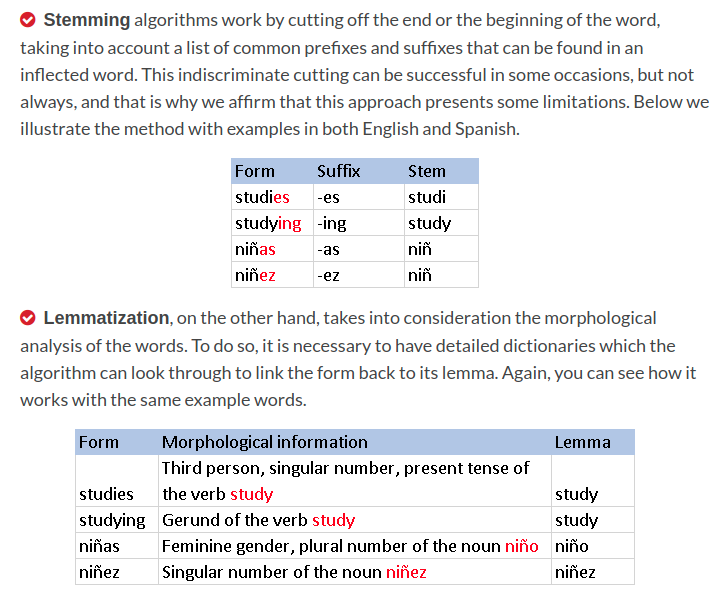

In [24]:
def stem(tokens):
    ps = PorterStemmer()
    stemmed = [ps.stem(t) for t in tokens]
    return list(stemmed)

In [25]:
print(d1_tokens[:10])
d1_stems = stem(d1_tokens) #still a list of stemmed words which might not make sense
d1_stems[:10]

['tv', 'future', 'hands', 'viewers', 'home', 'theatre', 'systems', 'plasma', 'highdefinition', 'tvs']


['tv',
 'futur',
 'hand',
 'viewer',
 'home',
 'theatr',
 'system',
 'plasma',
 'highdefinit',
 'tv']

In [27]:
def lemmatize(tokens):
    lz = WordNetLemmatizer()
    lemmatized = [lz.lemmatize(t) for t in tokens]
    return list(lemmatized)

In [28]:
print(d1_tokens[:10])
d1_lemmas = lemmatize(d1_tokens)
d1_lemmas[:10] #still a list which contains lemmas of the words in the dataset

['tv', 'future', 'hands', 'viewers', 'home', 'theatre', 'systems', 'plasma', 'highdefinition', 'tvs']


['tv',
 'future',
 'hand',
 'viewer',
 'home',
 'theatre',
 'system',
 'plasma',
 'highdefinition',
 'tv']

In [29]:
def toLower(tokens):
    return [t.lower() for t in tokens]

In [30]:
print(d1_lemmas[:10])
d1_lower = toLower(d1_lemmas)
d1_lower[:10]

['tv', 'future', 'hand', 'viewer', 'home', 'theatre', 'system', 'plasma', 'highdefinition', 'tv']


['tv',
 'future',
 'hand',
 'viewer',
 'home',
 'theatre',
 'system',
 'plasma',
 'highdefinition',
 'tv']

### POS Tagging


*   Function to Assign POS tags to each token
*   Pass tokens of a document as arguments to the given function,the returned value will have POS tags corresponding to each token in that document

The POS tagger in the NLTK library outputs specific tags for certain words. The list of POS tags is as follows, with examples of what each POS stands for.

* CC coordinating conjunction
* CD cardinal digit
* DT determiner
* EX existential there (like: “there is” … think of it like “there exists”)
* FW foreign word
* IN preposition/subordinating conjunction
* JJ adjective ‘big’
* JJR adjective, comparative ‘bigger’
* JJS adjective, superlative ‘biggest’
* LS list marker 1)
* MD modal could, will
* NN noun, singular ‘desk’
* NNS noun plural ‘desks’
* NNP proper noun, singular ‘Harrison’
* NNPS proper noun, plural ‘Americans’
* PDT predeterminer ‘all the kids’
* POS possessive ending parent’s
* PRP personal pronoun I, he, she
* PRP possessive pronoun my, his, hers
* RB adverb very, silently,
* RBR adverb, comparative better
* RBS adverb, superlative best
* RP particle give up
* TO, to go ‘to’ the store.
* UH interjection, errrrrrrrm
* VB verb, base form take
* VBD verb, past tense, took
* VBG verb, gerund/present participle taking
* VBN verb, past participle is taken
* VBP verb, sing. present, known-3d take
* VBZ verb, 3rd person sing. present takes
* WDT wh-determiner which
* WP wh-pronoun who, what
* WP$ possessive wh-pronoun whose
* WRB wh-adverb where, when

In [31]:
nltk.download('averaged_perceptron_tagger') #The averaged_perceptron_tagger.zip contains the pre-trained English [Part-of-Speech (POS]](https://en.wikipedia.org/wiki/Part_of_speech) tagger in NLTK.

def POStagging(tokens):
    return nltk.pos_tag(tokens)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [32]:
d1_pos = POStagging(d1_tokens)
d1_pos[:10]

[('tv', 'NN'),
 ('future', 'NN'),
 ('hands', 'VBZ'),
 ('viewers', 'NNS'),
 ('home', 'NN'),
 ('theatre', 'VBP'),
 ('systems', 'NNS'),
 ('plasma', 'JJ'),
 ('highdefinition', 'NN'),
 ('tvs', 'IN')]

**Q: Can you think of a reason why POS tagger needs to be contextual?**

### Named Entity Recognition (NER) 
(also known as entity identification, entity chunking and entity extraction) 

**What is an entity?**

Named entity is any real-world object, such as persons, locations, organizations, products, etc., that can be denoted with a proper name. e.g., New York City is an instance of a Place.

**Use cases:**

*   Creating related tags or linking to relevant topics
*   Context understanding in search, recommendations




---



Using another useful NLP library called **[Spacy](https://spacy.io/usage)**.

In [33]:
# Install and import spacy
!pip install -U spacy
import spacy
print("\n\nSpacy with version=={} imported.".format(spacy.__version__))

     |████████████████████████████████| 6.0 MB 4.2 MB/s 
     |████████████████████████████████| 42 kB 1.2 MB/s 
     |████████████████████████████████| 10.1 MB 36.8 MB/s 
     |████████████████████████████████| 181 kB 54.9 MB/s 
     |████████████████████████████████| 628 kB 53.9 MB/s 
     |████████████████████████████████| 451 kB 36.7 MB/s 
  Attempting uninstall: catalogue
    Found existing installation: catalogue 1.0.0
    Uninstalling catalogue-1.0.0:
      Successfully uninstalled catalogue-1.0.0
  Attempting uninstall: srsly
    Found existing installation: srsly 1.0.5
    Uninstalling srsly-1.0.5:
      Successfully uninstalled srsly-1.0.5
  Attempting uninstall: thinc
    Found existing installation: thinc 7.4.0
    Uninstalling thinc-7.4.0:
      Successfully uninstalled thinc-7.4.0
  Attempting uninstall: spacy
    Found existing installation: spacy 2.2.4
    Uninstalling spacy-2.2.4:
      Successfully uninstalled spacy-2.2.4


Spacy with version==3.2.2 imported.


**Language Model for Spacy:**
A language model is the context provider for a particular language. It contains informations such as how the words are related and which one's are tags, entity, etc.

In [34]:
# Download the language model for spacy
!python -m spacy download en
spacy_model = spacy.load("en_core_web_sm") ## spacy_model = spacy.load('en')  ## 
print("\n\nSpacy model imported at: {}".format(spacy_model))

⚠ As of spaCy v3.0, shortcuts like 'en' are deprecated. Please use the
full pipeline package name 'en_core_web_sm' instead.
     |████████████████████████████████| 13.9 MB 764 kB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


Spacy model imported at: <spacy.lang.en.English object at 0x7f72ba19ae50>


In [35]:
nlp = spacy.load("en_core_web_sm")
nlp.get_pipe("ner").labels

('CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART')

In [36]:
doc1 = spacy_model(u"Apple Inc is looking at buying U.K. startup for $1 billion.")
for ent in doc1.ents:
    print("Token [{}] -> Entity type [{}] indices [{}] - [{}].".format(ent.text, ent.label_, ent.start_char, ent.end_char))

Token [Apple Inc] -> Entity type [ORG] indices [0] - [9].
Token [U.K.] -> Entity type [GPE] indices [31] - [35].
Token [$1 billion] -> Entity type [MONEY] indices [48] - [58].


In [ ]:
# Filtering sentences
doc2 = spacy_model(u"""In the expression named entity, the word named restricts
                   the task to those entities for which one or many strings,
                   such as words or phrases, stands (fairly) consistently for
                   some referent. This is closely related to rigid designators,
                   as defined by Kripke[3][4], although in practice NER deals
                   with many names and referents that are not philosophically
                   'rigid'. For instance, the automotive company created by
                   Henry Ford in 1903 can be referred to as Ford or Ford Motor
                   Company, although 'Ford' can refer to many other entities as
                   well (see Ford). Rigid designators include proper names as
                   well as terms for certain biological species and substances,
                   but exclude pronouns (such as 'it'; see coreference 
                   resolution), descriptions that pick out a referent by its 
                   properties (see also De dicto and de re), and names for kinds
                   of things as opposed to individuals (for example 'Bank').""")
sentences = list(doc2.sents)
print("This is the first sentence: [{}]".format(sentences [0]))
#sentences

This is the first sentence: [In the expression named entity, the word named restricts
                   the task to those entities for which one or many strings,
                   such as words or phrases, stands (fairly) consistently for
                   some referent.]


**Q: Write a function to process all the text data from any of the datasets using spacy.**

In [ ]:
# your function here:
# def filtering_ner():

In [ ]:
# call your function from here:
# tokens, ners, start_idx, end_idx = filtering_ner()

### Vector Representation of Documents

TF-IDF is an information retrieval technique that weighs a term’s frequency (TF) and its inverse document frequency (IDF). Each word or term has its respective TF and IDF score. The product of the TF and IDF scores of a term is called the TF*IDF weight of that term.
Put simply, the higher the TF*IDF score (weight), the rarer the term and vice versa.

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer #https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

In [38]:
print(len(dataset))
print(dataset)

10
['tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to 

In [39]:
stop_words = set(stopwords.words('english'))
c_vectorizer = CountVectorizer(stop_words=stop_words,lowercase = True)
Count_Vectors = c_vectorizer.fit_transform(dataset)
Count_Vectors.shape

(10, 1170)

In [41]:
print(len(c_vectorizer.get_feature_names_out()))
c_vectorizer.get_feature_names_out()

1170


array(['000', '10', '100', ..., 'young', 'younger', 'zeta'], dtype=object)

In [42]:
Count_Vectors.todense()

matrix([[1, 0, 1, ..., 0, 1, 0],
        [1, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 1, 0, 0]])

In [43]:
first_freq_vector = Count_Vectors[1]
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_freq_vector.T.todense(), index=c_vectorizer.get_feature_names(), columns=["count"])
df.sort_values(by=["count"],ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,count
mr,12
worldcom,8
ebbers,7
myers,5
accounting,5
...,...
future,0
futurologist,0
gadgets,0
gamble,0


In [ ]:
c_vectorizer_alt = CountVectorizer(
    stop_words=stop_words, 
    lowercase = True, 
    ngram_range=(1,2), 
    min_df=2, 
    max_df=0.80,
    max_features=30, 
    tokenizer=word_tokenize)

Count_Vectors_alt = c_vectorizer_alt.fit_transform(dataset)
print(Count_Vectors_alt.shape)
c_vectorizer_alt.get_feature_names()

(10, 30)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ["'d", "'ll", "'re", "'s", "'ve", 'could', 'might', 'must', "n't", 'need', 'sha', 'wo', 'would'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['$',
 '(',
 ')',
 '-',
 '. mr',
 ':',
 'also',
 'bbc',
 'blair',
 'claim',
 'cup',
 'election',
 'end',
 'labour',
 'league',
 'make',
 'mr',
 'much',
 'number',
 'one',
 'people',
 'play',
 'said',
 'take',
 'today',
 'told',
 'tv',
 'uk',
 'us',
 'would']

In [44]:
stop_words = set(stopwords.words('english'))
vectorizer = TfidfVectorizer(stop_words=stop_words,lowercase = True)
Doc_TFIDF_Vector = vectorizer.fit_transform(dataset)

In [45]:
#Shape of the Document Vector
print("Shape of the TF-IDF Vector is:",Doc_TFIDF_Vector[0].shape)

Shape of the TF-IDF Vector is: (1, 1170)


#### Visualizing TF-IDF Vector of the first document

In [46]:
Doc_TFIDF_Vector.todense()

matrix([[0.02932551, 0.        , 0.03449689, ..., 0.        , 0.03449689,
         0.        ],
        [0.04143437, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.07495053, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.07257091, 0.        ,
         0.        ]])

In [48]:
# import pandas as pd 
first_doc_vector = Doc_TFIDF_Vector[1]
# place tf-idf values in a pandas data frame
df = pd.DataFrame(first_doc_vector.T.todense(), index=vectorizer.get_feature_names(), columns=["tfidf"])
df.sort_values(by=["tfidf"],ascending=False)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,tfidf
worldcom,0.389929
mr,0.386748
ebbers,0.341188
myers,0.243705
accounting,0.243705
...,...
future,0.000000
futurologist,0.000000
gadgets,0.000000
gamble,0.000000


**Q: Count the non-zero entries in the first vector**

In [ ]:
## Code here:


#### Visualizing TF-IDF Vector representation of tokens

In [49]:
# To know which words the indices are referring to
features  = vectorizer.get_feature_names()
features[:200]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['000',
 '10',
 '100',
 '110m',
 '11bn',
 '12a',
 '13',
 '13s',
 '15',
 '16',
 '160bn',
 '17',
 '180bn',
 '184m',
 '19',
 '1960s',
 '1977',
 '1990s',
 '1m',
 '20',
 '2001',
 '2002',
 '2006',
 '21m',
 '25',
 '26',
 '2m',
 '35bn',
 '38',
 '40',
 '4m',
 '50',
 '57',
 '60',
 '80',
 '8bn',
 '8m',
 '90',
 '95',
 'abiding',
 'abilities',
 'able',
 'according',
 'accounting',
 'accused',
 'across',
 'acting',
 'activists',
 'adam',
 'added',
 'admission',
 'admitted',
 'advertising',
 'adverts',
 'advising',
 'affable',
 'africa',
 'afterwards',
 'aggravating',
 'ago',
 'aired',
 'alan',
 'allegations',
 'allen',
 'allow',
 'allows',
 'almost',
 'alone',
 'already',
 'also',
 'although',
 'always',
 'anakin',
 'andrew',
 'andy',
 'angeles',
 'animated',
 'announce',
 'announced',
 'annual',
 'another',
 'anti',
 'anybody',
 'anything',
 'appeal',
 'appearance',
 'applying',
 'april',
 'arguably',
 'arguing',
 'arm',
 'arsenal',
 'ask',
 'asked',
 'asks',
 'assisting',
 'aston',
 'attack',
 'au

## Find similar documents
Given a list of documents, find k most similar documents to it using TFIDF vectors

In [50]:
query_doc = pd.read_csv("https://storage.googleapis.com/dataset-uploader/bbc/bbc-text.csv")
# query_doc.head()
queries = query_doc.text[:10].to_list()
queries

['tv future in the hands of viewers with home theatre systems  plasma high-definition tvs  and digital video recorders moving into the living room  the way people watch tv will be radically different in five years  time.  that is according to an expert panel which gathered at the annual consumer electronics show in las vegas to discuss how these new technologies will impact one of our favourite pastimes. with the us leading the trend  programmes and other content will be delivered to viewers via home networks  through cable  satellite  telecoms companies  and broadband service providers to front rooms and portable devices.  one of the most talked-about technologies of ces has been digital and personal video recorders (dvr and pvr). these set-top boxes  like the us s tivo and the uk s sky+ system  allow people to record  store  play  pause and forward wind tv programmes when they want.  essentially  the technology allows for much more personalised tv. they are also being built-in to hig

In [51]:
import numpy as np
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

**Q: Write function to find most similar vectors for Count and TFIDF vectors.**

In [52]:
# Code here: Use cosine_similarity or cosine_distances to calculate vector similarity

## Visualization
Use t-sne to project vectors into 2 dimensions and plot

In [53]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [54]:
def plot_features_tsne(X, tokens: list = None):
    """ Plots TSNE representations of tokens and their embeddings.

    :param X: N x D
    :param tokens: N
    :param limit_view:
    """
    tsne = TSNE(n_components=2, random_state=0)
    
    X_2d = tsne.fit_transform(X)
    print(X_2d.shape, len(tokens))
    colors = range(X_2d.shape[0])

    plt.figure(figsize=(6, 5))
    if tokens is not None:
        for i, token in enumerate(tokens):
            plt.annotate(token, xy=(X_2d[i, 0], X_2d[i, 1]), zorder=1)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=colors, s=60, alpha=.5)
    plt.title('TSNE visualization of input vectors in 2D')
    # plt.xlabel('x-axis')
    # plt.ylabel('y-axis')
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(10, 2) 10


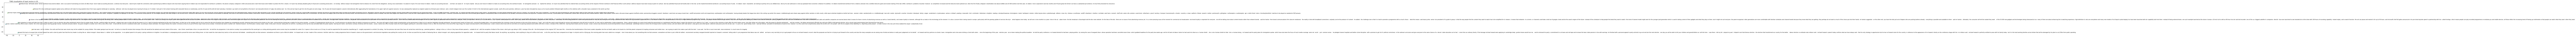

In [55]:
# print(Count_Vectors.shape, len(c_vectorizer.get_feature_names()))
plot_features_tsne(Count_Vectors, tokens = dataset)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(10, 2) 10


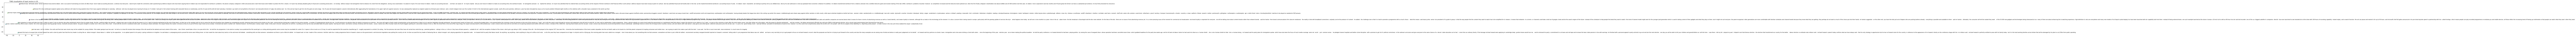

In [56]:
plot_features_tsne(Doc_TFIDF_Vector, tokens = dataset)